In [1]:
import pandas as pd
train=pd.read_csv('../input/song-popularity-prediction/train.csv')

In [2]:
test=pd.read_csv('../input/song-popularity-prediction/test.csv')

In [3]:
features=train.columns
features

Index(['id', 'song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

In [4]:
train.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [5]:
test.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0,308523.0,0.019845,NaN,0.908939,0.001438,NaN,0.112832,-8.890172,0,0.082714,126.129304,4,0.399620
1,1,200011.0,0.070119,0.731256,0.444655,0.002020,10.0,0.139040,-6.301214,0,0.061685,86.448149,3,0.499424
2,2,279758.0,0.810637,0.568858,0.125466,0.898841,0.0,0.226614,-11.542478,0,0.041868,99.544351,3,0.564951
3,3,249197.0,NaN,0.871789,0.557342,0.000715,4.0,0.325391,-7.905546,1,0.046815,123.063854,4,0.906485
4,4,NaN,0.765568,0.624687,0.710794,0.000346,8.0,0.308284,NaN,0,0.129284,88.703121,3,0.935571


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40000 non-null  int64  
 1   song_duration_ms  35899 non-null  float64
 2   acousticness      36008 non-null  float64
 3   danceability      35974 non-null  float64
 4   energy            36025 non-null  float64
 5   instrumentalness  36015 non-null  float64
 6   key               35935 non-null  float64
 7   liveness          35914 non-null  float64
 8   loudness          36043 non-null  float64
 9   audio_mode        40000 non-null  int64  
 10  speechiness       40000 non-null  float64
 11  tempo             40000 non-null  float64
 12  time_signature    40000 non-null  int64  
 13  audio_valence     40000 non-null  float64
 14  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   song_duration_ms  9043 non-null   float64
 2   acousticness      9050 non-null   float64
 3   danceability      9024 non-null   float64
 4   energy            8945 non-null   float64
 5   instrumentalness  9000 non-null   float64
 6   key               9008 non-null   float64
 7   liveness          8994 non-null   float64
 8   loudness          8974 non-null   float64
 9   audio_mode        10000 non-null  int64  
 10  speechiness       10000 non-null  float64
 11  tempo             10000 non-null  float64
 12  time_signature    10000 non-null  int64  
 13  audio_valence     10000 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 1.1 MB


# # EDA and Null Checks

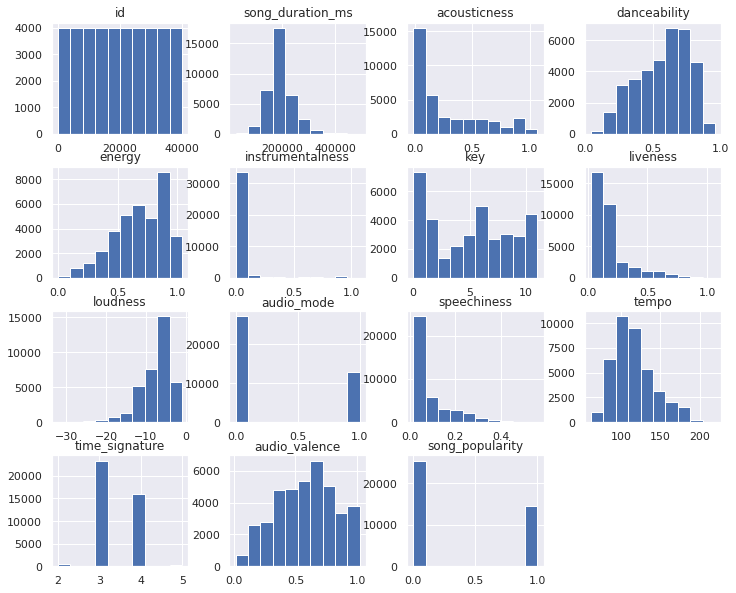

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
train.hist(figsize=(12,10))
plt.show()

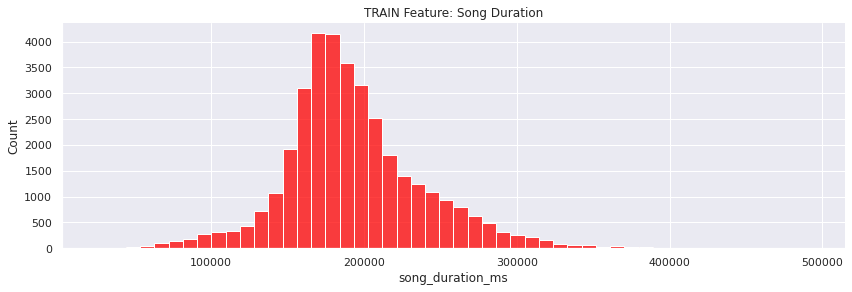

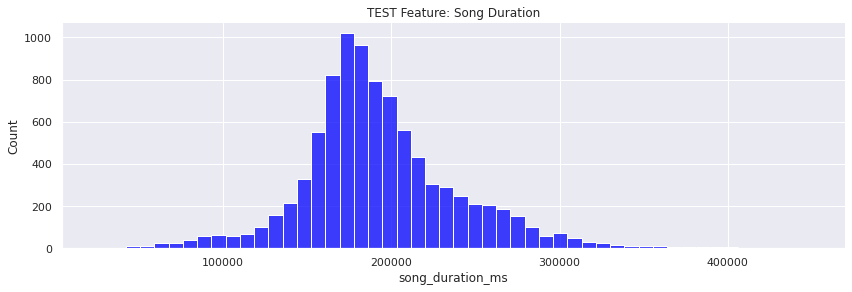

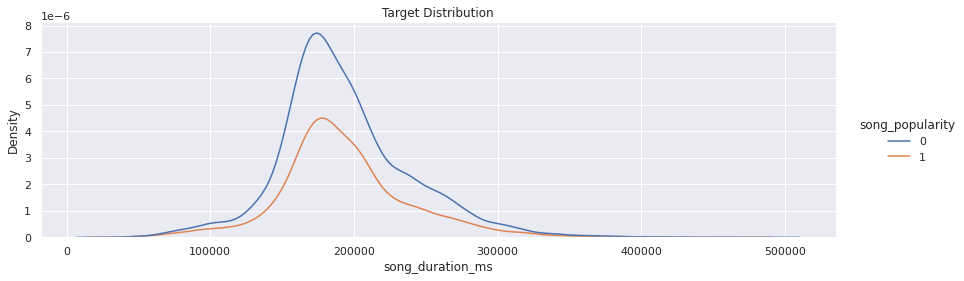

In [9]:
# song_duration_ms plot
#ax=sns.displot(data=train,x='song_duration_ms',kind='kde',color='red',height=4,aspect=3) 
ax=sns.displot(data=train,x='song_duration_ms',kind='hist',color='red',bins=50,height=4,aspect=3).set(title='TRAIN Feature: Song Duration')
ax=sns.displot(data=test,x='song_duration_ms',kind='hist',color='blue',bins=50,height=4,aspect=3).set(title='TEST Feature: Song Duration')
ax=sns.displot(data=train,x='song_duration_ms',kind='kde',height=4,aspect=3,hue='song_popularity').set(title='Target Distribution')

In [ ]:
# acousticness plot
import numpy as np
ax=sns.displot(data=train,x='acousticness',kind='hist',color='orange',height=5,aspect=3).set(title='TRAIN Feature: Acousticness')
ax=sns.displot(data=test,x='acousticness',kind='hist',color='green',height=5,aspect=3).set(title='TEST Feature: Acousticness')
ax=sns.displot(data=train,x='acousticness',kind='kde',height=5,aspect=3,hue='song_popularity').set(title='Target Distribution') 

In [ ]:
# danceability plot
ax=sns.displot(data=train,x='danceability',kind='hist',color='green',height=4,aspect=3).set(title='TRAIN Feature: Danceability')
ax=sns.displot(data=test,x='danceability',kind='hist',color='red',height=4,aspect=3).set(title='TEST Feature: Danceability')
ax=sns.displot(data=train,x='danceability',kind='kde',height=4,aspect=3,hue='song_popularity').set(title='Target Distribution')

In [ ]:
# energy plot - FYI - #kind=kde for distribution plot
ax=sns.displot(data=train,x='energy',kind='hist',color='purple',height=4,aspect=3).set(title='TRAIN Feature: Energy')         
ax=sns.displot(data=test,x='energy',kind='hist',color='orange',height=4,aspect=3).set(title='TEST Feature: Energy')
ax=sns.displot(data=train,x='energy',kind='kde',height=4,aspect=3,hue='song_popularity').set(title='Target Distribution')

In [ ]:
# instrumentalness plot
ax=sns.displot(data=train,x='instrumentalness',kind='kde',color='brown',height=4,aspect=3).set(title='TRAIN Feature: Instrumentalness') 
ax=sns.displot(data=train,x=np.log(train['instrumentalness']),kind='hist',color='brown',bins=30,height=4,aspect=3).set(title='TRAIN Feature: Log Instrumentalness')
ax=sns.displot(data=test,x='instrumentalness',kind='kde',color='darkblue',height=4,aspect=3).set(title='TEST Feature: Instrumentalness')
ax=sns.displot(data=train,x=np.log(test['instrumentalness']),kind='hist',color='darkblue',bins=30,height=4,aspect=3).set(title='TEST Feature: Log Instrumentalness')
ax=sns.displot(data=train,x='instrumentalness',kind='kde',height=4,aspect=3,hue='song_popularity').set(title='Target Distribution')

In [ ]:
# key plot
sns.displot(data=train,x='key',color='darkblue',height=4,aspect=3).set(title='TRAIN Feature: Key')
sns.displot(data=test,x='key',color='darkred',height=4,aspect=3).set(title='TEST Feature: Key')
ax=sns.displot(data=train,x='key',height=4,aspect=3,hue='song_popularity',multiple="stack").set(title='Target Distribution')

In [ ]:
# liveness plot
ax=sns.displot(data=train,x='liveness',kind='hist',color='Magenta',bins=50,height=4,aspect=3).set(title='TRAIN Feature: Liveness')
ax=sns.displot(data=test,x='liveness',kind='hist',color='purple',bins=50,height=4,aspect=3).set(title='TEST Feature: Liveness')
ax=sns.displot(data=train,x='liveness',kind='kde',height=4,aspect=4,hue='song_popularity').set(title='Target Distribution') 

In [ ]:
# loudness plot
ax=sns.displot(data=train,x='loudness',kind='hist',color='Crimson',height=4,bins=50,aspect=3).set(title='TRAIN Feature: Loudness')
ax=sns.displot(data=test,x='loudness',kind='hist',color='green',height=4,bins=50,aspect=3).set(title='TEST Feature: Loudness')
ax=sns.displot(data=train,x='loudness',kind='kde',height=4,aspect=4,hue='song_popularity').set(title='Target Distribution') 

In [ ]:
#audio mode
sns.displot(data=train,x='audio_mode',color='cyan',height=4,aspect=3).set(title='TRAIN Feature: Audio Mode') 
sns.displot(data=test,x='audio_mode',color='red',height=4,aspect=3).set(title='TEST Feature: Audio Mode') 
ax=sns.displot(data=train,x='audio_mode',height=4,aspect=3,hue='song_popularity',multiple="stack").set(title='Target Distribution') 

In [ ]:
#Speechiness 
ax=sns.displot(data=train,x='speechiness',kind='hist',color='lightGreen',height=4,aspect=3).set(title='TRAIN Feature: Speechiness')
ax=sns.displot(data=test,x='speechiness',kind='hist',color='orange',height=4,aspect=3).set(title='TEST Feature: Speechiness')
ax=sns.displot(data=train,x='speechiness',kind='kde',height=4,aspect=4,hue='song_popularity').set(title='Target Distribution')

In [ ]:
#tempo
ax=sns.displot(data=train,x='tempo',kind='hist',color='Black',bins=50,height=4,aspect=3).set(title='TRAIN Feature: Tempo')
ax=sns.displot(data=test,x='tempo',kind='hist',color='cyan',bins=50,height=4,aspect=3).set(title='TEST Feature: Tempo') 
ax=sns.displot(data=train,x='tempo',kind='kde',height=4,aspect=4,hue='song_popularity').set(title='Target Distribution') 

In [ ]:
#Time signature
sns.displot(data=train,x='time_signature',color='DarkOrange',height=4,aspect=3).set(title='TRAIN Feature: Time Signature')
sns.displot(data=test,x='time_signature',color='Magenta',height=4,aspect=3).set(title='TEST Feature: Time Signature') 
ax=sns.displot(data=train,x='time_signature',height=4,aspect=3,hue='song_popularity',multiple="stack").set(title='Target Distribution')

In [ ]:
#Audio Valence
ax=sns.displot(data=train,x='audio_valence',kind='hist',color='tan',height=4,aspect=3).set(title='TRAIN Feature: Instrumentalness') 
ax=sns.displot(data=test,x='audio_valence',kind='hist',color='black',height=4,aspect=3).set(title='TEST Feature: Instrumentalness') 
ax=sns.displot(data=train,x='audio_valence',kind='kde',height=4,aspect=4,hue='song_popularity').set(title='Target Distribution') 

In [ ]:
#Song popularity
sns.displot(data=train,x='song_popularity',color='maroon',height=4,aspect=3).set(title='TRAIN Target: Song Popularity') 

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.heatmap(train.corr(),annot=True,linewidths=.5)

In [ ]:
#Max columns having nulls for any row
train_null=pd.DataFrame(train[train.isnull().any(axis=1)])
train_null.isna().sum(axis=1).max()

In [ ]:
type(train_null)

In [ ]:
train_null[train_null.isna().sum(axis=1)>=4]

In [ ]:
#Dropping all the rows having null in 4 or more columns
null_idx=train[train.isna().sum(axis=1)>=4]
train.drop(null_idx.index,inplace=True)

In [ ]:
train

In [10]:
#Tranforming columns intrumentalness in train and test
import numpy as np
train['log_instrumentalness']=train['instrumentalness'].apply(lambda x: np.log(x))
test['log_instrumentalness']=test['instrumentalness'].apply(lambda x: np.log(x))

In [11]:
#cols_to_be_transformed
cols_to_be_transformed=[]
for cols in train:
    if train[cols].isna().any():
        cols_to_be_transformed.append(cols)
cols_to_be_transformed

['song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'log_instrumentalness']

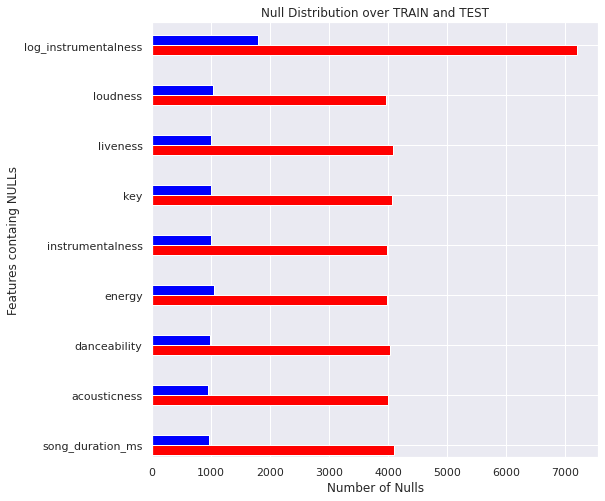

In [12]:
#number of nulls in each column
train[cols_to_be_transformed].isnull().sum().plot.barh(figsize=(6,4),color='red',position=1,width=0.2)
test[cols_to_be_transformed].isnull().sum().plot.barh(figsize=(8,8),color='blue',position=0,width=0.2)
plt.ylabel('Features containg NULLs')
plt.xlabel('Number of Nulls')
plt.title('Null Distribution over TRAIN and TEST')
plt.show()

In [13]:
inst_df=train[(train['instrumentalness'].isnull()==False)&(train['log_instrumentalness'].isnull()==True)]
inst_df

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity,log_instrumentalness
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0,NaN
5,5,188891.0,0.035655,0.825919,0.804528,-0.000005,4.0,0.120758,-6.122926,0,0.039012,115.679128,4,0.709408,0,NaN
19,19,266726.0,0.021030,0.323277,NaN,-0.000861,NaN,0.239698,-12.692935,1,0.031522,124.811208,4,0.350090,1,NaN
32,32,241003.0,0.169185,0.366957,0.444087,-0.000414,0.0,0.174994,-11.382770,0,0.021477,122.559643,3,0.363342,0,NaN
56,56,188964.0,0.001064,0.485361,0.621721,-0.000156,9.0,0.112102,-6.397362,0,0.253269,94.720364,3,0.689321,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39925,39925,211337.0,0.065026,0.701357,0.738950,-0.001056,0.0,0.393245,-3.446706,0,0.053741,96.630939,3,0.917492,0,NaN
39933,39933,192121.0,0.357300,0.721753,0.917437,-0.000419,8.0,0.108709,-7.628649,0,0.059489,144.886032,4,0.990359,0,NaN
39934,39934,161913.0,0.631399,0.823035,0.441256,-0.001393,8.0,0.109665,-6.018644,0,0.039143,95.730450,4,0.844139,0,NaN
39935,39935,189116.0,0.365409,0.475314,0.883345,-0.000737,9.0,0.219542,NaN,0,0.277162,127.588380,3,0.544720,1,NaN


* So we see that by only taking log of the feature ***instrumentalness*** we increase the number of nulls even more, so next approach to try out is to split the feature into 2.**

In [14]:
train['part_b_instrumentalness']=np.where((train['instrumentalness'].isnull()==False) & (train['log_instrumentalness'].isnull()==True),0.0,train['log_instrumentalness'])
test['part_b_instrumentalness']=np.where((test['instrumentalness'].isnull()==False) & (test['log_instrumentalness'].isnull()==True),0.0,test['log_instrumentalness'])

In [15]:
#cols_to_be_transformed
cols_to_be_transformed=[]
for cols in train:
    if train[cols].isna().any():
        cols_to_be_transformed.append(cols)
cols_to_be_transformed

['song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'log_instrumentalness',
 'part_b_instrumentalness']

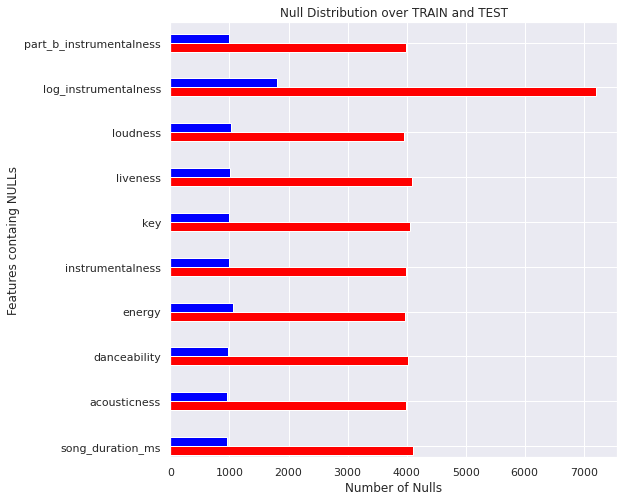

In [16]:
train[cols_to_be_transformed].isnull().sum().plot.barh(figsize=(6,4),color='red',position=1,width=0.2)
test[cols_to_be_transformed].isnull().sum().plot.barh(figsize=(8,8),color='blue',position=0,width=0.2)
plt.ylabel('Features containg NULLs')
plt.xlabel('Number of Nulls')
plt.title('Null Distribution over TRAIN and TEST')
plt.show()

In [17]:
#keeping only those intrumentalness value in intrumentalness where its log becomes null
import numpy as np
train['part_a_instrumentalness']=np.where((train['part_b_instrumentalness']==0.0),train['instrumentalness'],0.0)
test['part_a_instrumentalness']=np.where((test['part_b_instrumentalness']==0.0),test['instrumentalness'],0.0)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       40000 non-null  int64  
 1   song_duration_ms         35899 non-null  float64
 2   acousticness             36008 non-null  float64
 3   danceability             35974 non-null  float64
 4   energy                   36025 non-null  float64
 5   instrumentalness         36015 non-null  float64
 6   key                      35935 non-null  float64
 7   liveness                 35914 non-null  float64
 8   loudness                 36043 non-null  float64
 9   audio_mode               40000 non-null  int64  
 10  speechiness              40000 non-null  float64
 11  tempo                    40000 non-null  float64
 12  time_signature           40000 non-null  int64  
 13  audio_valence            40000 non-null  float64
 14  song_popularity       

In [ ]:
#Trying to add isna columns for all the coulumns which have null
train_bool=train[cols_to_be_transformed].isna().add_prefix('bool_')
train_bool['id']=train['id']
train_mod=train.merge(train_bool,how='left',left_on='id',right_on='id')
train_mod.info()

In [ ]:
#Trying to add isna columns for all the coulumns which have null in test set
test_bool=test[cols_to_be_transformed].isna().add_prefix('bool_')
test_bool['id']=test['id']
test_mod=test.merge(test_bool,how='left',left_on='id',right_on='id')
test_mod.info()

In [19]:
train_mod=pd.DataFrame(train)

In [20]:
#Dropping extra columns - instrumentalness, log_instrumentalness, bool_instrumentalness, bool_log_instrumentalness, id, song_popularity
y_train=train_mod['song_popularity']
#train_mod.drop(['id','song_popularity','instrumentalness','log_instrumentalness','bool_instrumentalness','bool_log_instrumentalness'],axis=1,inplace=True)
train_mod.drop(['id','song_popularity','instrumentalness','log_instrumentalness'],axis=1,inplace=True)

In [21]:
test_mod=pd.DataFrame(test)

In [22]:
#Dropping extra columns - instrumentalness, log_instrumentalness, bool_instrumentalness, bool_log_instrumentalness, id from test set
#test_mod.drop(['id','instrumentalness','log_instrumentalness','bool_instrumentalness','bool_log_instrumentalness'],axis=1,inplace=True)
test_mod.drop(['id','instrumentalness','log_instrumentalness'],axis=1,inplace=True)

In [23]:
#cols_to_be_transformed
cols_to_be_transformed=[]
for cols in train_mod:
    if train_mod[cols].isna().any():
        cols_to_be_transformed.append(cols)
cols_to_be_transformed

['song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'key',
 'liveness',
 'loudness',
 'part_b_instrumentalness']

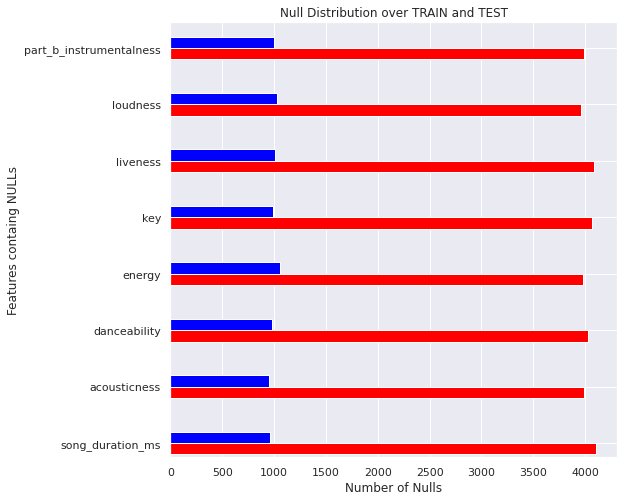

In [24]:
train_mod[cols_to_be_transformed].isnull().sum().plot.barh(figsize=(6,4),color='red',position=1,width=0.2)
test_mod[cols_to_be_transformed].isnull().sum().plot.barh(figsize=(8,8),color='blue',position=0,width=0.2)
plt.ylabel('Features containg NULLs')
plt.xlabel('Number of Nulls')
plt.title('Null Distribution over TRAIN and TEST')
plt.show()

#Using 2 separate columns for instrumentalness, we reached a point where we got a smooth distribution and controlled the number of missing values

# # Imputation and Modeling

In [25]:
#Imputing data using KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

pipeline_knn=Pipeline([
    ('scale',StandardScaler()),
    ('impute',KNNImputer(n_neighbors=5)),
])

In [27]:
#Imputing data using IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

pipeline_iter=Pipeline([
    ('iter',IterativeImputer(random_state=42,estimator=ExtraTreesRegressor(n_estimators=10, random_state=42)))
])

In [28]:
pipeline_iter.get_params()

{'memory': None,
 'steps': [('iter',
   IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10,
                                                  random_state=42),
                    random_state=42))],
 'verbose': False,
 'iter': IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10,
                                                random_state=42),
                  random_state=42),
 'iter__add_indicator': False,
 'iter__estimator__bootstrap': False,
 'iter__estimator__ccp_alpha': 0.0,
 'iter__estimator__criterion': 'mse',
 'iter__estimator__max_depth': None,
 'iter__estimator__max_features': 'auto',
 'iter__estimator__max_leaf_nodes': None,
 'iter__estimator__max_samples': None,
 'iter__estimator__min_impurity_decrease': 0.0,
 'iter__estimator__min_impurity_split': None,
 'iter__estimator__min_samples_leaf': 1,
 'iter__estimator__min_samples_split': 2,
 'iter__estimator__min_weight_fraction_leaf': 0.0,
 'iter__estimator__n_estimators': 10,
 'iter__estimator__n_jobs

In [29]:
#Creating Stratified folds for cross-validation 
from sklearn.model_selection import StratifiedShuffleSplit

ss=StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=42)

In [30]:
ss

StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None)

In [31]:
#y_train=train_mod['song_popularity']
X_train=pd.DataFrame(train_mod)

In [32]:
X_train

,song_duration_ms,acousticness,danceability,energy,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,part_b_instrumentalness,part_a_instrumentalness
0,212990.0,0.642286,0.856520,0.707073,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,-6.213908,0.000000
1,NaN,0.054866,0.733289,0.835545,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,-6.912106,0.000000
2,193213.0,NaN,0.188387,0.783524,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0.000000,-0.002694
3,249893.0,0.488660,0.585234,0.552685,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,-7.405263,0.000000
4,165969.0,0.493017,NaN,0.740982,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,-6.198169,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,237799.0,NaN,0.748942,0.511234,0.0,0.173803,-8.853673,0,0.078060,168.262924,3,0.178159,-5.838521,0.000000
39996,191119.0,0.067488,0.672830,0.889685,5.0,0.122924,-7.798993,0,0.188607,110.684544,3,0.790626,-6.704695,0.000000
39997,160879.0,0.877431,0.409065,0.292671,10.0,0.110664,-15.378585,0,0.031294,99.556074,3,0.177947,NaN,0.000000
39998,193918.0,NaN,0.365738,NaN,1.0,0.356308,-4.661977,1,0.054096,139.857384,3,0.772978,-7.989350,0.000000


# Trying RandomForest, SVC and KNN models with KNN Imputer

In [ ]:
#Creating model
from sklearn.ensemble import RandomForestClassifier

impute_clf=RandomForestClassifier(n_estimators=50,random_state=42,max_depth=25)

In [ ]:
#Model SVC
from sklearn.svm import SVC

svc_clf=SVC(random_state=42,C=15,tol=0.001,kernel='rbf')

In [ ]:
#Model KNN
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier(n_neighbors=10)

In [ ]:
#Fitting the pipeline on one split, modeling and cross validation accuracy
from sklearn.metrics import roc_auc_score

def model_validate(model,pipeline,X_train,y_train):
    scores_val=[]
    scores_test=[]
    for train_idx,val_idx in ss.split(X_train,y_train):
        X_train_new,X_val=X_train.iloc[train_idx],X_train.iloc[val_idx]
        y_train_new,y_val=y_train.iloc[train_idx],y_train.iloc[val_idx]
        print(pipeline)
        train_trans=pipeline.fit_transform(X_train_new)
        val_trans=pipeline.transform(X_val)
        model.fit(train_trans,y_train_new)
        val_pred=model.predict(val_trans)
        test_trans=pipeline.transform(test_mod)
        test_pred=pd.DataFrame(model.predict(test_mod))
        scores_val.append(roc_auc_score(y_val,val_pred))
        print(test_pred)
    return scores_val

In [ ]:
#Forest_score with KNN Imputer -
#forest_acc=model_validate(impute_clf,pipeline_knn,X_train,y_train)
#forest_acc

In [ ]:
#Forest_score with InterativeImputer -
forest_acc_iter=model_validate(impute_clf,pipeline_iter,X_train,y_train)
forest_acc_iter

In [ ]:
#SVC score with KNN Imuter
svc_acc=model_validate(svc_clf,piepline_knn,X_train,y_train)
svc_acc

In [ ]:
#SVC score with IterativeImuter
svc_acc=model_validate(svc_clf,pipeline_iter,X_train,y_train)
svc_acc

In [ ]:
knn_clf.get_params()

In [ ]:
knn_acc=model_validate(knn_clf,X_train,y_train)
knn_acc

In [ ]:
import xgboost as xgb

xgb_clf=xgb.XGBClassifier(random_state=42,n_estimators=50,max_depth=9,eval_metric='auc',alpha=0.06,learning_rate=0.2)
xgb_acc=model_validate(xgb_clf,pipeline_iter,X_train,y_train)
np.mean(xgb_acc)

In [33]:
X_train_iter=pipeline_iter.fit_transform(X_train)

/opt/conda/lib/python3.7/site-packages/sklearn/impute/_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [ ]:
ratio=sum(y_train==0) / sum(y_train==1)
ratio

In [257]:
import xgboost as xgb
xgb_clf=xgb.XGBClassifier(random_state=42,n_estimators=150,eval_metric='auc',max_depth=9,reg_alpha=0.04,learning_rate=0.2005)
xgb_clf.fit(X_train_iter,y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2005,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0.04, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgb_clf.feature_importances_

In [ ]:
fig,ax=plt.subplots(figsize=(9,6))
ax=plt.barh(train_mod.columns, xgb_clf.feature_importances_,color='orange')

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_clf)

In [ ]:
#RandomForest 
X_train_knn=pipeline_knn.fit_transform(X_train)

In [ ]:
impute_clf.fit(X_train_iter,y_train)

In [ ]:
svc_clf.fit(X_train_iter,y_train)

In [276]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(random_state=42,max_bin=60,num_leaves=380,learning_rate=0.1002)
lgb_clf.fit(X_train_iter, y_train)
lgb_clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1002,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 380,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'max_bin': 60}

In [185]:
#Impute missing values and predict
def test_predict(estimator,imputer):
    print(imputer)
    X_test=imputer.transform(test_mod)
    return estimator.predict(X_test)

In [36]:
sub_xboost=pd.DataFrame(test['id'])

In [277]:
sub_xboost['song_popularity']=test_predict(lgb_clf,pipeline_iter)

Pipeline(steps=[('iter',
                 IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10,
                                                                random_state=42),
                                  random_state=42))])


In [278]:
sub_xboost['song_popularity'].value_counts()

0    8542
1    1458
Name: song_popularity, dtype: int64

In [279]:
sub_xboost.to_csv('submission_LGB_final.csv')

In [ ]:
# acousticness plot
import numpy as np
ax=sns.displot(data=X_train_new,x='acousticness',kind='hist',color='orange',height=5,aspect=3)
ax=sns.displot(data=train_trans,x='acousticness',kind='hist',color='orange',height=5,aspect=3)

In [ ]:
# danceability plot
ax=sns.displot(data=X_train_new,x='danceability',kind='hist',color='green',height=4,aspect=3)
ax=sns.displot(data=train_trans,x='danceability',kind='hist',color='green',height=4,aspect=3)
ax=sns.displot(data=train,x='danceability',kind='kde',height=4,aspect=3,hue='song_popularity')

In [ ]:
# energy plot
ax=sns.displot(data=X_train_iter,x='energy',kind='hist',color='purple',height=4,aspect=3)           #kind=kde for distribution plot
ax=sns.displot(data=X_test,x='energy',kind='hist',color='purple',height=4,aspect=3)
ax=sns.displot(data=train,x='energy',kind='kde',height=4,aspect=3,hue='song_popularity') 

In [ ]:
# instrumentalness plot
ax=sns.displot(data=train,x='instrumentalness',kind='kde',color='brown',height=4,aspect=3) 
ax=sns.displot(data=X_train_new,x='log_instrumentalness',kind='hist',color='brown',height=4,aspect=3) 
ax=sns.displot(data=train_trans,x='log_instrumentalness',kind='hist',color='brown',height=4,aspect=3)
ax=sns.displot(data=train,x='instrumentalness',kind='kde',height=4,aspect=3,hue='song_popularity') 

Using the log of the feature looks a reasonable outcome

In [ ]:
# key plot
sns.displot(data=X_train_new,x='key',color='darkblue',height=4,aspect=3)
sns.displot(data=train_trans,x='key',color='darkblue',height=4,aspect=3)
ax=sns.displot(data=train,x='key',height=4,aspect=3,hue='song_popularity',multiple="stack") 

In [ ]:
# liveness plot
ax=sns.displot(data=X_train_new,x='liveness',kind='hist',color='Magenta',height=4,aspect=3)
ax=sns.displot(data=train_trans,x='liveness',kind='hist',color='Magenta',height=4,aspect=3)
#ax=sns.displot(data=train,x=np.log(train['liveness']),kind='kde',color='Magenta',height=4,aspect=3)
ax=sns.displot(data=train,x='liveness',kind='kde',height=4,aspect=4,hue='song_popularity') 

Using the log of this feature as we get a good distribution using the latter

In [ ]:
# loudness plot
ax=sns.displot(data=X_train_new,x='loudness',kind='hist',color='Crimson',height=4,aspect=3)
ax=sns.displot(data=train_trans,x='loudness',kind='hist',color='Crimson',height=4,aspect=3)
ax=sns.displot(data=train,x='loudness',kind='kde',height=4,aspect=4,hue='song_popularity') 

In [ ]:
#Checking correlation of the columns - with the null values
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.heatmap(X_train.corr(),annot=True,linewidths=.5)